In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("/content/income.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


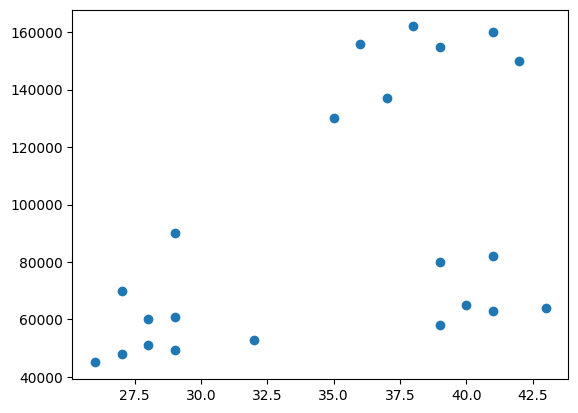

In [ ]:
plt.scatter(df.Age,df.Income)

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predict=km.fit_predict(df[['Age','Income']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['Cluster']=y_predict
df

,Name,Age,Income,Cluster
0,Diya Nayak,27,70000,2
1,Shravan Omayya,29,90000,2
2,Shivam Pandey,29,61000,0
3,Bhakti Paradkar,28,60000,0
4,Omkar Pashte,42,150000,1
5,Akshata Patil,39,155000,1
6,Shubham Pawar,41,160000,1
7,Sumit Phadke,38,162000,1
8,Niraj Phafat,36,156000,1
9,Siddhant Puthran,35,130000,1


In [ ]:
#Sperate 3 cluster into 3 dataframe
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

In [ ]:
df1

,Name,Age,Income,Cluster
2,Shivam Pandey,29,61000,0
3,Bhakti Paradkar,28,60000,0
11,Raj Rathod,26,45000,0
12,Sujit Sahu,27,48000,0
13,Mitali Salunkhe,28,51000,0
14,Siddhi Shah,29,49500,0
15,Ashish Sharma,32,53000,0
16,Azad sharma,40,65000,0
17,Hardik Shetty,41,63000,0
18,Rishabh Shirke,43,64000,0


In [ ]:
df2

,Name,Age,Income,Cluster
4,Omkar Pashte,42,150000,1
5,Akshata Patil,39,155000,1
6,Shubham Pawar,41,160000,1
7,Sumit Phadke,38,162000,1
8,Niraj Phafat,36,156000,1
9,Siddhant Puthran,35,130000,1
10,Aditya Raj,37,137000,1


In [ ]:
df3

,Name,Age,Income,Cluster
0,Diya Nayak,27,70000,2
1,Shravan Omayya,29,90000,2
19,Harshit Singh,39,80000,2
20,Prerna Singh,41,82000,2


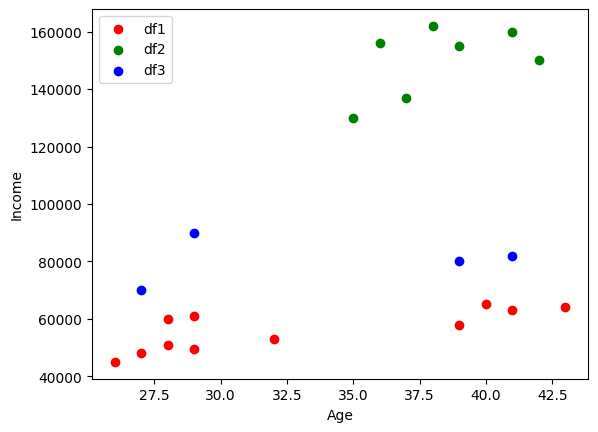

In [ ]:
plt.scatter(df1.Age,df1.Income,color='red')
plt.scatter(df2.Age,df2.Income,color='green')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['df1','df2','df3'])

In [ ]:
# The ulimate goal to perform standarization is to bring down all the features to a common scale without distoring the difference in the range of the values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df.Income = scaler.transform(df[['Income']])

In [ ]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [ ]:
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df.Cluster = y_pred

In [ ]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

In [ ]:
centers = km.cluster_centers_
centers[:, 1]

array([0.11633428, 0.8974359 , 0.2022792 ])

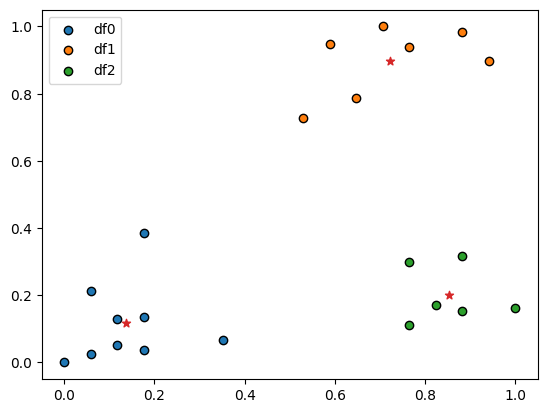

In [ ]:
plt.scatter(df0.Age, df0.Income, edgecolor='k', label='df0')
plt.scatter(df1.Age, df1.Income, edgecolor='k', label='df1')
plt.scatter(df2.Age, df2.Income, edgecolor='k', label='df2')
plt.scatter(centers[:, 0], centers[:, 1], marker="*")
plt.legend()
plt.show()

In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])